<a href="https://colab.research.google.com/github/rranjithkumar100/AI-Training/blob/main/Day_40_Mushroom_Classification_Algms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

In [2]:
from google.colab import files
d = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [3]:
mush = pd.read_csv('mushrooms.csv')

In [4]:
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
mush["class"].unique()

array(['p', 'e'], dtype=object)

In [11]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
mush.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [8]:
mush.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:

from sklearn.preprocessing import LabelEncoder
mush_encoded = mush.copy()
le = LabelEncoder()
for col in mush_encoded.columns:
  mush_encoded[col] = le.fit_transform(mush_encoded[col])

mush_encoded.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [10]:
mush_encoded.max()

,0
class,1
cap-shape,5
cap-surface,3
cap-color,9
bruises,1
odor,8
gill-attachment,1
gill-spacing,1
gill-size,1
gill-color,11


In [12]:
mush_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [18]:
def plot_col(col, hue=None, color=['blue', 'purple'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    # Pass the column name to the 'x' argument instead of as the first positional argument.
    sns.countplot(x=col, hue=hue, palette=color, saturation=0.6, data=mush_encoded, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

<ipython-input-18-a10b582bdaca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, hue=hue, palette=color, saturation=0.6, data=mush_encoded, dodge=True, ax=ax)
<ipython-input-18-a10b582bdaca>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


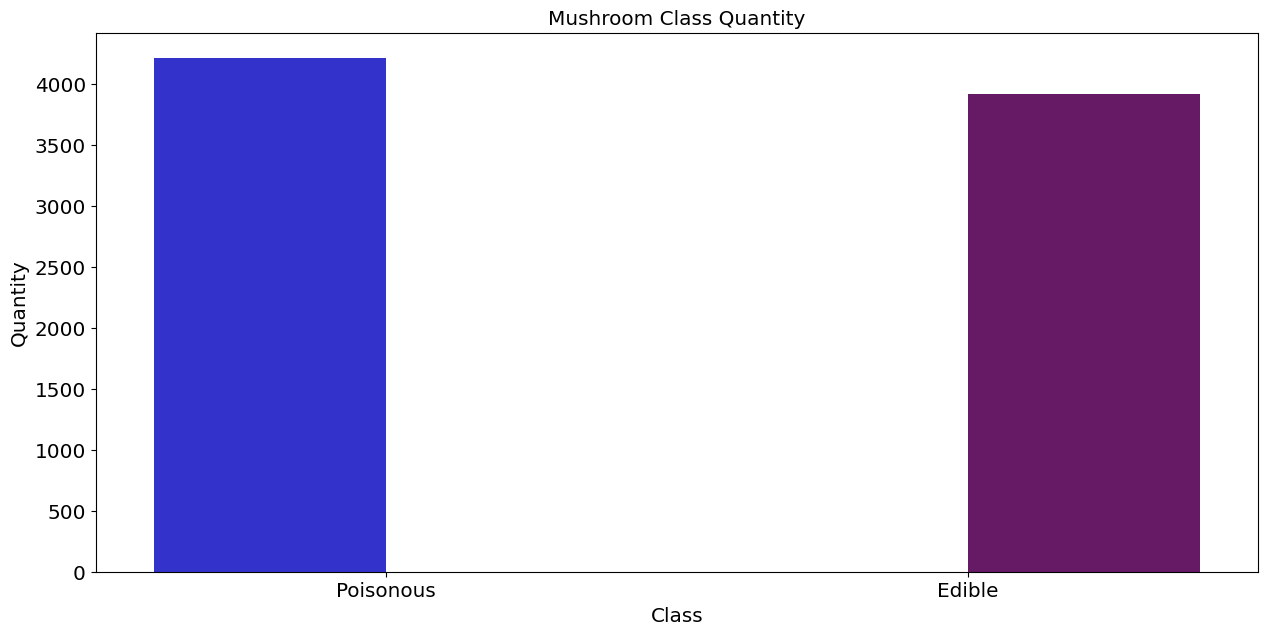

In [19]:
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)


<ipython-input-18-a10b582bdaca>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


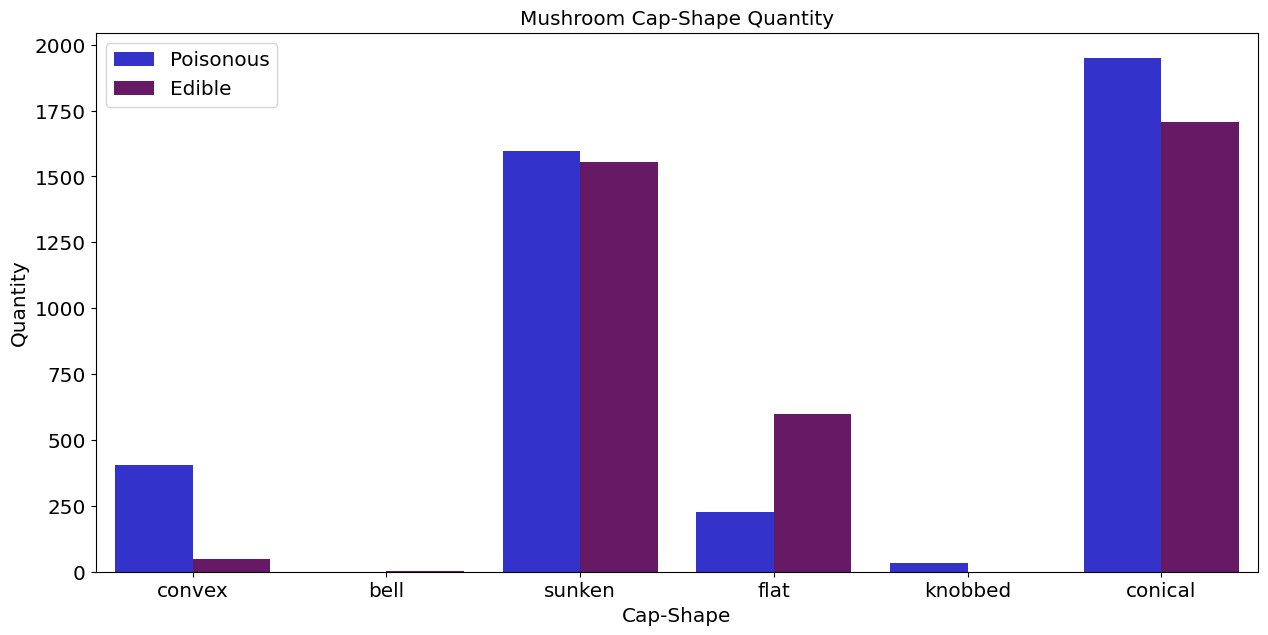

In [20]:
#Visualizing the number of mushrooms for each of the available cap sizes
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)


<ipython-input-18-a10b582bdaca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, hue=hue, palette=color, saturation=0.6, data=mush_encoded, dodge=True, ax=ax)
<ipython-input-18-a10b582bdaca>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


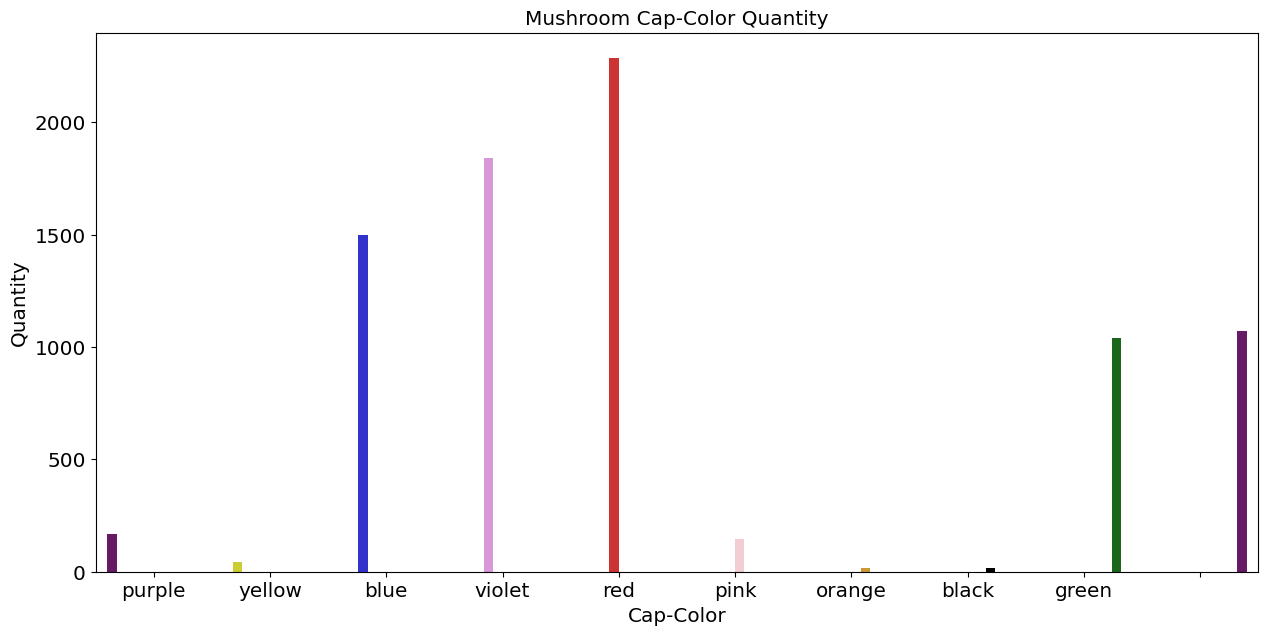

In [21]:
#Visualizing the number of mushrooms for each cap color
color_dict = {"purple":"n","yellow":"y", "blue":"w", "violet":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#class column is taken as a numpy array
y = mush_encoded["class"].values
#All the features are separated from our target value or label and stored in x
x = mush_encoded.drop(["class"],axis=1)
#Finally split the data into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size = 0.25)

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="newton-cg")
lr.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy: 95.08%


In [25]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score=0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [26]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))


Test Accuracy: 100.0%


In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 92.66%


In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


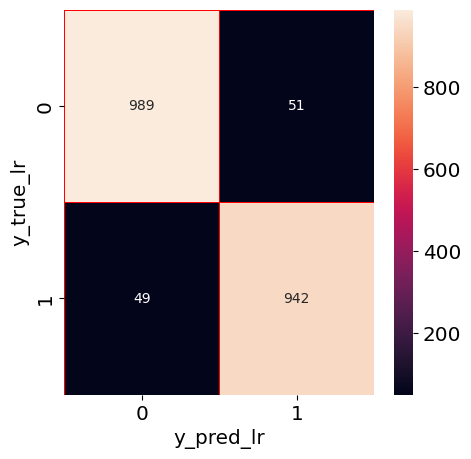

In [30]:
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

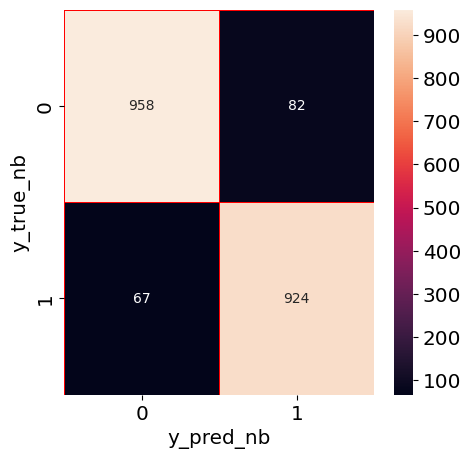

In [31]:
from sklearn.metrics import confusion_matrix
y_pred_nb = nb.predict(x_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()